#**Data Analysis of Users, Movies, and Ratings**

In [50]:
# OS: 'Operation System in Python' 
import os
# Pandas: Data Multiplation and Analysis 
import pandas as pd
# Matplotlib: Data visualization
from matplotlib import pyplot as plt 

%matplotlib inline

In [51]:
# Connect to my google drive using google.colab - drive package
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Set a repository path of the files
path = '/content/drive/My Drive/Data/movielens/'

In [53]:
# Check uploaded files
os.listdir(path)

['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt']

In [54]:
# Read csv files
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

* The column `timestamp` is not the time record of writing a review, not a date of launching a movie

In [55]:
# Discover the dataframes (type, row format, etc..)
print(ratings_df.shape)
print(ratings_df.head())
ratings_df.info()

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


`[raings_df]`
- Rows: 100,836 (values = numbers)
- Columns: 4 (userId, movieId, rating, timestamp)

In [56]:
print(tags_df.shape)
print(tags_df.head())
tags_df.info()

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


`[tags_df]`
- Rows: 3,683 (types = integer, string)
- Columns: 4 (userId, movieId, tag, timestamp)

In [57]:
print(movies_df.shape)
print(movies_df.head())
movies_df.info()

(9742, 2)
                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memor

`[movies_df]`
- Rows: 9,742 (types = integer, string)
- Columns: 2 (title, genres)

###**The Basic Statistics of Data of Movie Ratings**

In [58]:
list(ratings_df['userId'].values)[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [59]:
# Find the number of unique values in 'userId' and 'movieId', using unique() and len() 
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [60]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [61]:
# Find the average and standard diviation of 'ratings' column with mean() and std() 
print('The average of ratings:', ratings_df['rating'].mean())
print('The standard diviation of ratings:', ratings_df['rating'].std())

The average of ratings: 3.501556983616962
The standard diviation of ratings: 1.0425292390605359


In [62]:
# check the types of each column and null/non-null count before mining data - info()
# If all columns are non-null count, then the dataset is clean for analyzing
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [63]:
# Print the basic statistic information of the datasets 
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [64]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [65]:
movies_df.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [66]:
# check nan value - isnull(): select null data
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [67]:
tags_df.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [68]:
movies_df.isnull().sum()

title     0
genres    0
dtype: int64

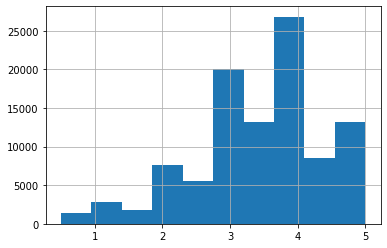

In [69]:
# Draw a histogram of a column which is valuable to analyze in terms of statistics
# It is possible to draw a histogram of 'userId' and 'movieId', but we can not find useful information from these charts.
ratings_df['rating'].hist()

## **Using 'Group By' Function of Pandas Package**

In [70]:
# Check 'how many each user wrote their reviews by rating?'
ratings_df.groupby(['userId','rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

## The Basic Statistics of the '`ratings`' data sets grouped by '`userId`', and '`rating`'

In [71]:
# Calculate the avearge of each column grouped by 'userId'
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


> A member, who has an id number 1, usually wrote reviews for movies with a number in the 1800s, with an average rating of 4.3.

In [72]:
# Create a new dataframe with counting numbers of the dataset grouped by 'userId' and 'rating'
# reset_index(): reset indexes of a dataframe
userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId','rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [73]:
ratings_df.groupby('userId')['movieId'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

In [74]:
ratings_df.groupby('userId')['movieId'].size() # size(): an attribute, not ignore 'nan' value, returns a length or a size of an object
user_info = ratings_df.groupby('userId')['movieId'].count() # count(): a function, ignore 'nan' value, only count number values

In [75]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [76]:
print(user_info)

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64


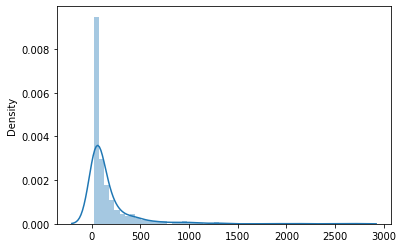

In [77]:
# Create a distribution plot to understand how many movies a user rated
import seaborn as sns
sns.distplot(user_info.values)

##**The Average Rating and The Number of Movies That Users Reviewed**

In [78]:
stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(),
    'rating_std': ratings_df.groupby('userId')['rating'].std()
})

stats_df.info()
stats_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie_count  610 non-null    int64  
 1   rating_avg   610 non-null    float64
 2   rating_std   610 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 19.1 KB


,movie_count,rating_avg,rating_std
userId,,,
1,232,4.366379,0.800048
2,29,3.948276,0.805615
3,39,2.435897,2.090642
4,216,3.555556,1.314204
5,44,3.636364,0.990441


In [79]:
print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


##**The Movie That Has Many Ratings (Many People Are Interested In)**
If many people watch a movie, that would have a good rating?

In [80]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_rating': ratings_df.groupby('movieId')['rating'].mean(),
    'std_rating': ratings_df.groupby('movieId')['rating'].std()
})

In [81]:
print(movieid_user_df)

         num_users_watch  avg_rating  std_rating
movieId                                         
1                    215    3.920930    0.834859
2                    110    3.431818    0.881713
3                     52    3.259615    1.054823
4                      7    2.357143    0.852168
5                     49    3.071429    0.907148
...                  ...         ...         ...
193581                 1    4.000000         NaN
193583                 1    3.500000         NaN
193585                 1    3.500000         NaN
193587                 1    3.500000         NaN
193609                 1    4.000000         NaN

[9724 rows x 3 columns]


In [82]:
movieid_user_df = movieid_user_df.reset_index()

In [83]:
print(movieid_user_df.shape)
print(movieid_user_df.head(5))

(9724, 4)
   movieId  num_users_watch  avg_rating  std_rating
0        1              215    3.920930    0.834859
1        2              110    3.431818    0.881713
2        3               52    3.259615    1.054823
3        4                7    2.357143    0.852168
4        5               49    3.071429    0.907148


In [84]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)
# We can consider whether we should the movie data with only '1' num_users_watch value throw away or not.

,movieId,num_users_watch,avg_rating,std_rating
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
...,...,...,...,...
3053,4093,1,1.500000,NaN
3049,4089,1,2.000000,NaN
6687,58351,1,4.000000,NaN
3045,4083,1,4.000000,NaN


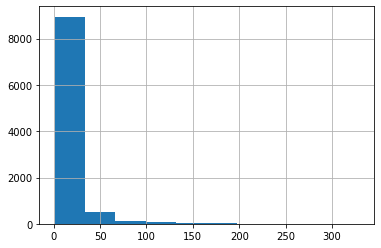

In [85]:
movieid_user_df['num_users_watch'].hist()

> In this histogram, 80% of values of this dataframe means that under 50 users review movies, whereas 20% of those means over 300 users rate movies. 
We can say that "this dataset is sparse".

In [86]:
# Movies with only 1 user or 1 rating 
movieid_user_df['movieId'][movieid_user_df.num_users_watch == 1].count()

3446

In [87]:
# under 3 times or 3 users who rate a movie
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

##**A Movie with The Highest Rating, A Movie with Many Ratings**

In [88]:
# Using the information of movies
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [89]:
# Movies which get many ratings
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [90]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(), # The result is same when 'rating' column is used
})

In [91]:
df.head(5)

,ratings_count
movieId,
1,215
2,110
3,52
4,7
5,49


In [92]:
df['movie_name'] = df.apply(lambda x: movies_df['title'].loc[x.index]) 
df.head(5)

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)


1. `loc()`: location() function
2. `apply()`: This function vectorize a complex calcuation to a column of a dataframe
3. `lambda x`: It functions same as 'def' (lambda x = def x:) and usually use with apply() 

In [93]:
df.sort_values(by='ratings_count', ascending=False)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
...,...,...
4093,1,Cop (1988)
4089,1,Born in East L.A. (1987)
58351,1,City of Men (Cidade dos Homens) (2007)


##**A Distribution of Ratings of a Particular Movie**

- movieid : 356, Forrest Gump(1994)
- movieid : 2571, Matrix, The (1999)

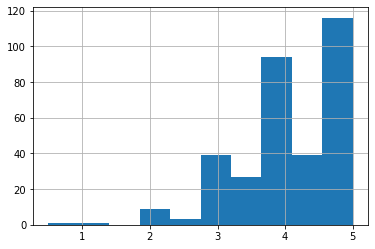

In [94]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()

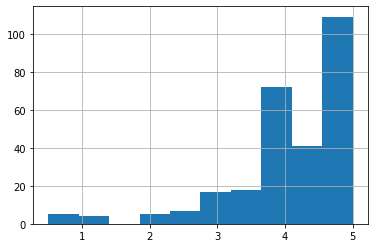

In [95]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

##**Are The Rating Given By a Particular User and A distribution of Ratings of An Acutal Movie Are Similar?**

- Am I a general movie watcher or a person who has an unique taste?

In [96]:
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)] 

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


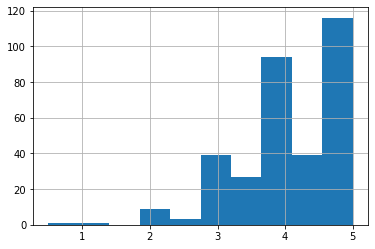

In [97]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()

In [98]:
ratings_df[(ratings_df.movieId == 2571) & (ratings_df.rating < 2)] 

,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


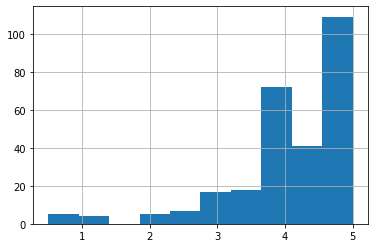

In [99]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()

#**The Analysis of Basic Information of Movies**

In [100]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [101]:
# Connect to my google drive using google.colab - drive package
from google.colab import drive
drive.mount('/content/drive')
# Set a repository path of the files
path = '/content/drive/My Drive/Data/movielens/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
os.listdir(path)

['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt']

In [103]:
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'),encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [104]:
print(ratings_df.shape)
print(ratings_df.shape)

(100836, 3)
(100836, 3)


## The Analysis of Genres

In [105]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [106]:
all_genres = [x.split('|') for x in movies_df['genres'].values]

In [107]:
print(all_genres)

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'], ['Adventure', 'Children', 'Fantasy'], ['Comedy', 'Romance'], ['Comedy', 'Drama', 'Romance'], ['Comedy'], ['Action', 'Crime', 'Thriller'], ['Comedy', 'Romance'], ['Adventure', 'Children'], ['Action'], ['Action', 'Adventure', 'Thriller'], ['Comedy', 'Drama', 'Romance'], ['Comedy', 'Horror'], ['Adventure', 'Animation', 'Children'], ['Drama'], ['Action', 'Adventure', 'Romance'], ['Crime', 'Drama'], ['Drama', 'Romance'], ['Comedy'], ['Comedy'], ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'], ['Comedy', 'Crime', 'Thriller'], ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'], ['Action', 'Crime', 'Thriller'], ['Drama', 'Sci-Fi'], ['Drama', 'Romance'], ['Drama'], ['Children', 'Drama'], ['Drama', 'Romance'], ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'], ['Crime', 'Drama'], ['Drama'], ['Mystery', 'Sci-Fi', 'Thriller'], ['Children', 'Drama'], ['Crime', 'Drama'], ['Children', 'Comedy'], ['Comedy', 'Romance'], ['Drama'], [

**- Method 1: itertools**

In [108]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Adventure', 'Western', 'Action', 'Children', 'IMAX', 'Film-Noir', 'Animation', 'Thriller', 'Musical', 'Mystery', 'Horror', 'Drama', 'Documentary', 'Sci-Fi', 'Fantasy', 'Comedy', 'Crime', 'War', '(no genres listed)', 'Romance']


[intertools.chain link text](https://hamait.tistory.com/803)

In [109]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Adventure,Western,Action,Children,IMAX,Film-Noir,Animation,Thriller,Musical,Mystery,Horror,Drama,Documentary,Sci-Fi,Fantasy,Comedy,Crime,War,(no genres listed),Romance
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
ct = 0
for i, row in genres_df.iterrows():
  movie_id = row.name
  list_of_genres = movies_df.loc[movie_id]['genres'].split('|')
  genres_df.loc[movie_id][list_of_genres] = 1

In [111]:
genres_df

,Adventure,Western,Action,Children,IMAX,Film-Noir,Animation,Thriller,Musical,Mystery,Horror,Drama,Documentary,Sci-Fi,Fantasy,Comedy,Crime,War,(no genres listed),Romance
movieId,,,,,,,,,,,,,,,,,,,,
1,1,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
2,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,1
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis = 1)
print(genres_df.shape)
print(genres_df)

(9742, 21)
         Adventure  Western  Action  Children  IMAX  Film-Noir  Animation  \
movieId                                                                     
1                1        0       0         1     0          0          1   
2                1        0       0         1     0          0          0   
3                0        0       0         0     0          0          0   
4                0        0       0         0     0          0          0   
5                0        0       0         0     0          0          0   
...            ...      ...     ...       ...   ...        ...        ...   
193581           0        0       1         0     0          0          1   
193583           0        0       0         0     0          0          1   
193585           0        0       0         0     0          0          0   
193587           0        0       1         0     0          0          1   
193609           0        0       0         0     0          0   

**- Method 2: Using get_dummies**

In [113]:
genres_df = movies_df['genres'].str.get_dummies(sep = '|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
movies_df = pd.concat([movies_df, genres_df], axis = 1)
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Analysis of Users and Ratings of a Particular Genre

In [115]:
movies_df.columns

Index(['title', 'genres', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [116]:
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [117]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,596,5.0,964982838
1,661,5.0,964982838
1,673,3.0,964981775
1,1023,5.0,964982681
...,...,...,...
610,146309,4.0,1493850187
610,149406,3.5,1479542295
610,152081,4.0,1493846503


In [118]:
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

In [119]:
animation_df['rating'].mean()

3.6299370349170004

## The Relationship Between Genres

In [120]:
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


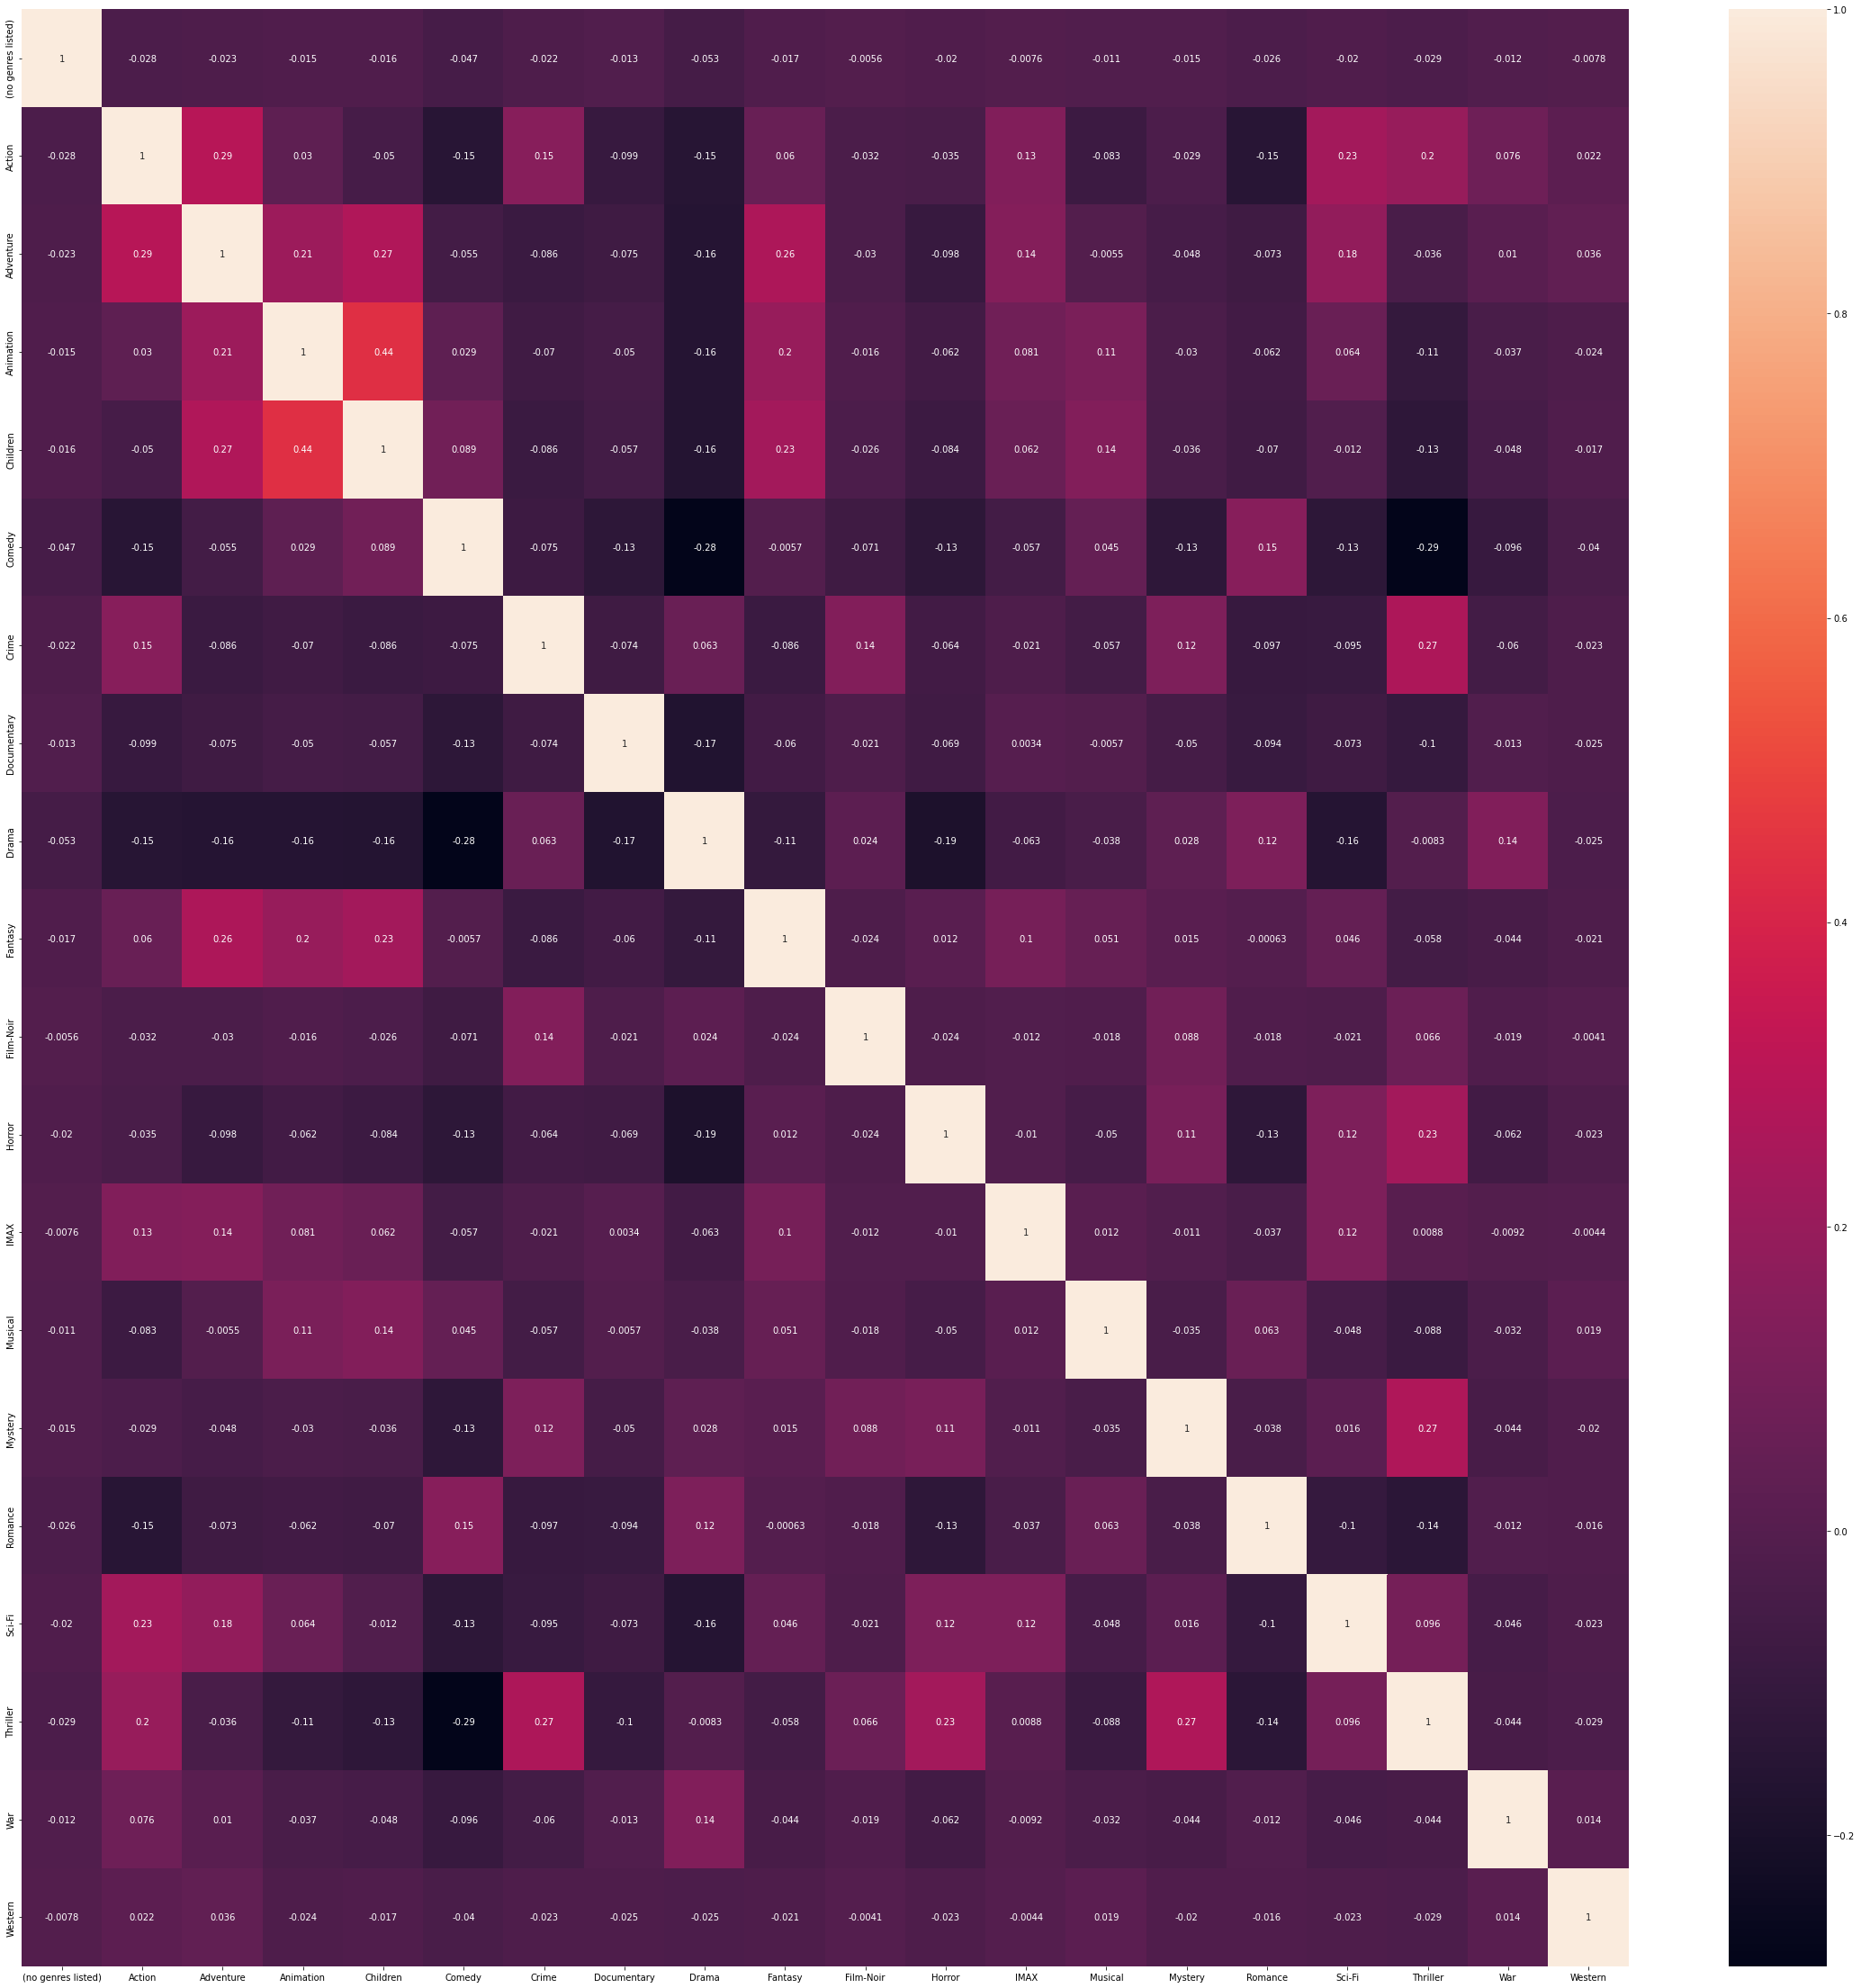

In [121]:
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

## Analysis of Movie Names and Release Dates

In [122]:
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
title_df = movies_df[['title', 'genres']]
title_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [124]:
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
3,Grumpier Old Men (1995),Comedy|Romance,(1995)
4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
5,Father of the Bride Part II (1995),Comedy,(1995)


In [125]:
#check nan value
title_df.isna().sum()

title      0
genres     0
year      13
dtype: int64

In [126]:
title_df[title_df['year'].isnull()]

,title,genres,year
movieId,,,
40697,Babylon 5,Sci-Fi,NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
143410,Hyena Road,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
156605,Paterson,(no genres listed),NaN
162414,Moonlight,Drama,NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN


In [127]:
# drop movie data which do not have 'year' value
title_df[title_df.genres == '(no genres listed)'].shape 
title_df.dropna(axis = 0, inplace = True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


## Anaysis of Movies by Year

In [128]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [129]:
year_freq_df.sort_values(ascending=False)
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

## The Release Dates and Ratings

In [130]:
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
title_df

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
193585,Flint (2017),Drama,2017


In [132]:
title_df[title_df['year'] == '2017']

,title,genres,year
movieId,,,
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
122898,Justice League (2017),Action|Adventure|Sci-Fi,2017
122906,Black Panther (2017),Action|Adventure|Sci-Fi,2017
122916,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,2017
122918,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,2017
...,...,...,...
190215,Liquid Truth (2017),Drama,2017
191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,2017
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017


In [133]:
# The average ratings of movies in 2017
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == '2017'].index)].mean()

3.5780911062906724

In [134]:
results = []
for year in title_df['year'].unique():
   avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
   results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns = ['year', 'avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
...,...,...
100,2014,3.512879
101,2015,3.410386
102,2016,3.387261
103,2017,3.578091
